### Author : Nilesh Deshmukh
### Project : Term deposit Analysis & Prediction
### Email : nieldeshmukh02@gmail.com

## Context

Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term.
Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

## Goal

The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (variable y).

## Import Libraries

In [50]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, recall_score, precision_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

### Reading the data

In [2]:
#Reading training and testing data as dataframes
train_df = pd.read_csv("train.csv",sep =";")
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Data Understanding

In [3]:
#Dimensions of dataset
train_df.shape

(45211, 17)

In [4]:
#Information about the data types of features
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
#Statistical summary of training dataset
train_df.describe(include ='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [6]:
#Checking if there are any missing values
train_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#### The dataset is clean having no missing(null) values.

## Exploratory Data Analysis

Text(0.5, 1.0, 'Education type vs Count')

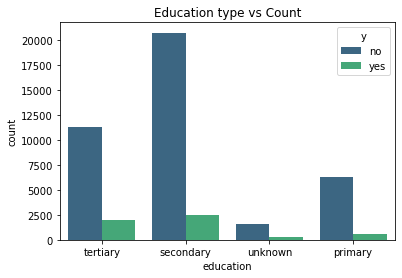

In [29]:
sns.countplot(x="education",data=train_df, hue = "y", palette='viridis')
plt.title("Education type vs Count")

Text(0.5, 1.0, 'Martial Status vs Count')

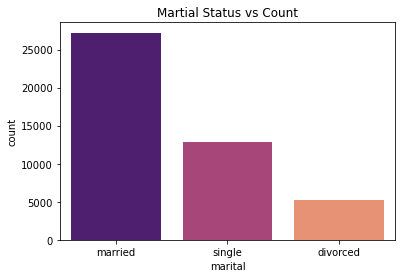

In [30]:
sns.countplot(x="marital", data = train_df, palette='magma')
plt.title("Martial Status vs Count")

* It seems like more number of married people invested in Term deposits

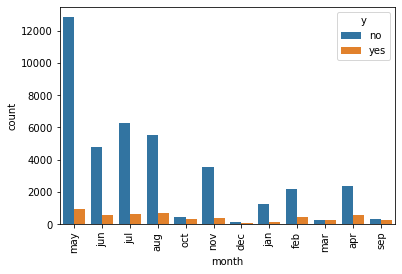

In [43]:
sns.countplot(data=train_df, x='month', hue='y')
plt.xticks(rotation=90)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'management'),
  Text(1, 0, 'technician'),
  Text(2, 0, 'entrepreneur'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'unknown'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'admin.'),
  Text(7, 0, 'services'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'unemployed'),
  Text(10, 0, 'housemaid'),
  Text(11, 0, 'student')])

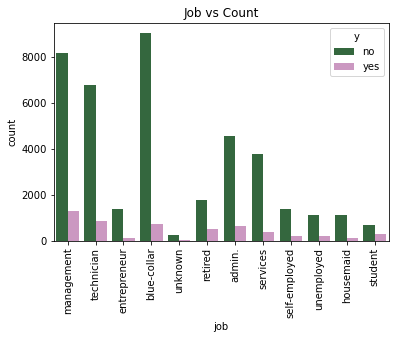

In [31]:
sns.countplot(x="job", data = train_df, hue ="y", palette='cubehelix')
plt.title("Job vs Count")
plt.xticks(rotation=90)

* It seems like more number of people working in management profiles have subscribed to term deposits

Text(0.5, 1.0, 'personal loan vs Count')

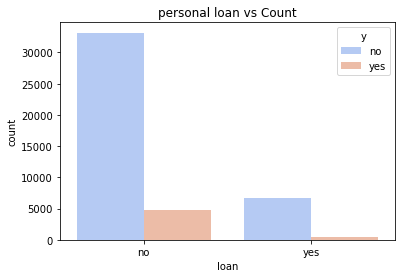

In [36]:
sns.countplot(x="loan", data = train_df, hue ="y", palette='coolwarm')
plt.title("personal loan vs Count")

Text(0.5, 1.0, 'housing loan vs Count')

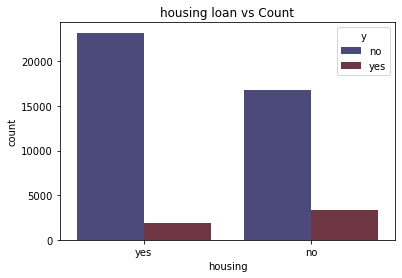

In [37]:
sns.countplot(x="housing", data = train_df, hue ="y", palette='icefire')
plt.title("housing loan vs Count")

Text(0.5, 1.0, 'Contact vs Count')

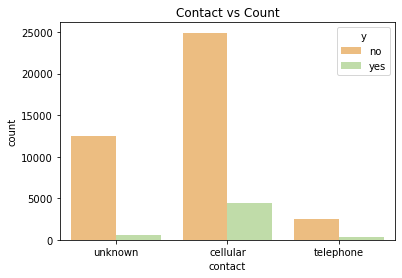

In [32]:
sns.countplot(x="contact", data = train_df, hue ="y", palette='Spectral')
plt.title("Contact vs Count")

<AxesSubplot:>

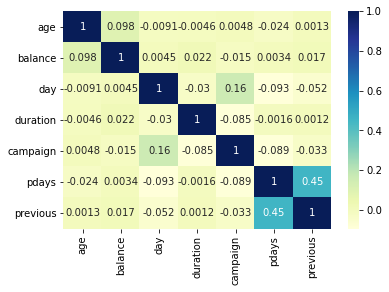

In [38]:
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot =True, cmap="YlGnBu")

* There is no multicollinearity between independent variables

## Feature Encoding

In [14]:
#Combining training and testing data for the purpose of encoding
df = pd.concat([train_df,test_df], ignore_index=True)
df.shape

(49732, 17)

In [15]:
df = pd.get_dummies(df,columns = ['job','marital','education','default','housing','month','loan','contact','poutcome'], drop_first = True)
df.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,no,0,0,...,1,0,0,0,0,0,1,0,0,1
1,44,29,5,151,1,-1,0,no,0,0,...,1,0,0,0,0,0,1,0,0,1
2,33,2,5,76,1,-1,0,no,0,1,...,1,0,0,0,1,0,1,0,0,1
3,47,1506,5,92,1,-1,0,no,1,0,...,1,0,0,0,0,0,1,0,0,1
4,33,1,5,198,1,-1,0,no,0,0,...,1,0,0,0,0,0,1,0,0,1


In [16]:
df['y'].replace('yes', 1, inplace=True)
df['y'].replace('no', 0, inplace=True)
df.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,1,0,0,0,1,0,1,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1


## Feature Scaling

In [17]:
target = df['y']
df = df.drop('y',axis = 1)
columns = df.columns
scaler = MinMaxScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df,columns=[columns])
df.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,0.519481,0.092259,0.133333,0.053070,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.337662,0.073067,0.133333,0.030704,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.194805,0.072822,0.133333,0.015453,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.376623,0.086476,0.133333,0.018707,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.194805,0.072812,0.133333,0.040260,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [18]:
y = np.array(target)
X = df

#Splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 20)

Predicting whether the client will subscribe to Term deposit or not

### Logistic regression

In [51]:
#Initializing and fitting the logistic regression model
lr_model = LogisticRegression(max_iter=125)      # warning: TOTAL NO. of ITERATIONS REACHED LIMIT.
lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))


Accuracy Score: 0.8993002493364434
Recall Score: 0.3311036789297659
Precision Score: 0.6626506024096386


The accuracy of the logistic regression model is 90%

In [20]:
print(confusion_matrix(y_test, y_pred))

[[10686   252]
 [ 1000   495]]


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10938
           1       0.66      0.33      0.44      1495

    accuracy                           0.90     12433
   macro avg       0.79      0.65      0.69     12433
weighted avg       0.88      0.90      0.88     12433



### SVM

Lets try with Support Vector Machine

In [52]:
clf = SVC(kernel = 'linear')
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred_svc))

Accuracy Score: 0.8907745515965575


In [23]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     10938
           1       0.66      0.19      0.30      1495

    accuracy                           0.89     12433
   macro avg       0.78      0.59      0.62     12433
weighted avg       0.87      0.89      0.86     12433



In [24]:
#Checkig for imbalances in the classes
y = np.bincount(y_train)
i = np.nonzero(y)[0]
np.vstack((i,y[i])).T

array([[    0, 32984],
       [    1,  4315]], dtype=int64)

The accuracy of the SVC model is 89%. But in both logistic regression and SVC, the recall value for class 1 is very less.
Its due to imbalances in the classes. To overcome this issue, lets apply SMOTE technique to the training dataset.

## SMOTE for oversampling minority class

In [25]:
#Applying SMOTE on the trainingg data
sm = SMOTE(random_state = 12)
X_train_smote, y_train_smote = sm.fit_sample(X_train,y_train)

In [26]:
#Checking for imbalances in the training data
y = np.bincount(y_train_smote)
i = np.nonzero(y)[0]
np.vstack((i,y[i])).T

array([[    0, 32984],
       [    1, 32984]], dtype=int64)

#### After applyting SMOTE, the class distribution is balanced

In [54]:
#Logistic regression on new oversampled data
lr_model = LogisticRegression(max_iter = 200)
lr_model.fit(X_train_smote,y_train_smote)
y_pred_smote = lr_model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred_smote))
print("Recall Score:", recall_score(y_test, y_pred_smote))
print("Precision Score:", precision_score(y_test, y_pred_smote))

Accuracy Score: 0.8442049384702003
Recall Score: 0.808695652173913
Precision Score: 0.42272727272727273


In [28]:
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91     10938
           1       0.42      0.81      0.56      1495

    accuracy                           0.84     12433
   macro avg       0.70      0.83      0.73     12433
weighted avg       0.90      0.84      0.86     12433



#### The accuracy of the logistic regression model is 84%. And also the recall value is higher for both the classes after applying SMOTE technique